# Task
Create a chart from the data in "/content/PARA_CHART_RAW_DATA.csv" with blue bars using the color code 0067db and orange bars, and remove the grid lines.

## Load the data

### Subtask:
Load the data from "/content/PARA_CHART_RAW_DATA.csv" into a DataFrame.


**Reasoning**:
Import the pandas library and load the data into a pandas DataFrame, then display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/PARA_CHART_RAW_DATA.csv')
display(df.head())

,DateTime,BKTNTR9 - Price per Share,BKTNTR9 - On Loan Quantity
0,08/12/2024,10.32,67520516
1,08/13/2024,10.29,67384260
2,08/14/2024,10.23,66176760
3,08/15/2024,10.96,66030524
4,08/16/2024,11.00,66580807


## Prepare the data

### Subtask:
Inspect the data and prepare it for plotting, ensuring the correct columns are used and any necessary transformations are applied.


**Reasoning**:
Inspect the dataframe's column names and data types, convert the 'DateTime' column to datetime objects, and prepare the data for plotting.



In [2]:
display(df.info())
df['DateTime'] = pd.to_datetime(df['DateTime'])
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateTime                    261 non-null    object 
 1   BKTNTR9 - Price per Share   261 non-null    float64
 2   BKTNTR9 - On Loan Quantity  261 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB


None

,DateTime,BKTNTR9 - Price per Share,BKTNTR9 - On Loan Quantity
0,2024-08-12,10.32,67520516
1,2024-08-13,10.29,67384260
2,2024-08-14,10.23,66176760
3,2024-08-15,10.96,66030524
4,2024-08-16,11.00,66580807


## Create the chart

### Subtask:
Generate the chart using the prepared data, specifying the blue and orange colors and removing grid lines as requested.


**Reasoning**:
Generate the chart using the prepared data, specifying the blue and orange colors and removing grid lines as requested.



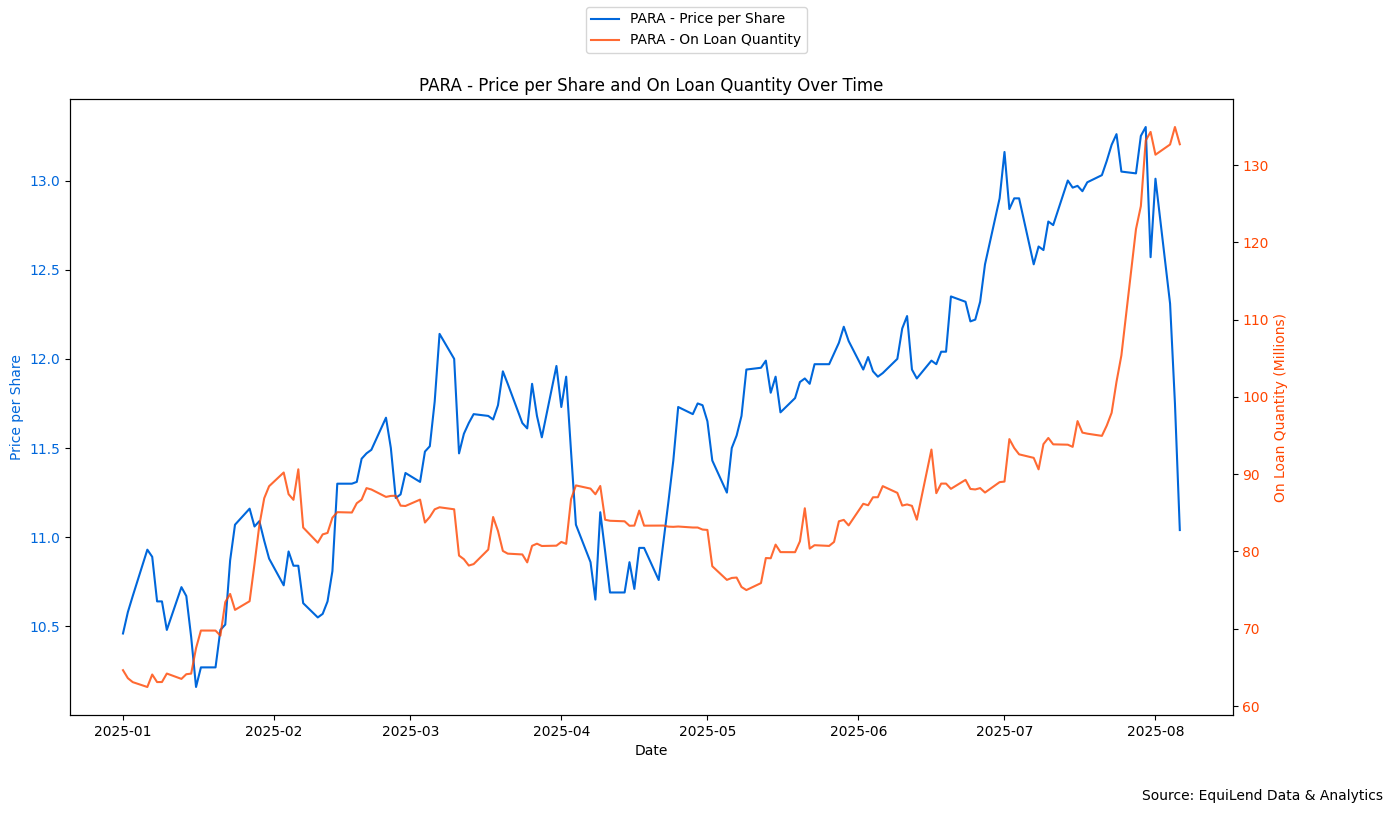

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots(figsize=(15, 8)) # Increased the width relative to the height

ax1.plot(filtered_df['DateTime'], filtered_df['BKTNTR9 - Price per Share'], color='#0067db', label='PARA - Price per Share')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price per Share', color='#0067db')
ax1.tick_params(axis='y', labelcolor='#0067db')

ax2 = ax1.twinx()
ax2.plot(filtered_df['DateTime'], filtered_df['BKTNTR9 - On Loan Quantity'], color='orangered', label='PARA - On Loan Quantity', alpha=0.8) # Changed to orangered and increased alpha
ax2.set_ylabel('On Loan Quantity (Millions)', color='orangered') # Updated label
ax2.tick_params(axis='y', labelcolor='orangered')
formatter = mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}') # Formatter for millions
ax2.yaxis.set_major_formatter(formatter)


plt.title('PARA - Price per Share and On Loan Quantity Over Time')
plt.grid(False)
fig.legend(loc="upper center") # Adjusted legend location
plt.text(1, 0, 'Source: EquiLend Data & Analytics', ha='right', va='bottom', transform=fig.transFigure)
plt.show()

In [19]:
import pandas as pd

filtered_df = df[(df['DateTime'] >= '2025-01-01') & (df['DateTime'] <= '2025-08-06')].copy()
display(filtered_df.head())
display(filtered_df.tail())

,DateTime,BKTNTR9 - Price per Share,BKTNTR9 - On Loan Quantity
102,2025-01-01,10.46,64633629
103,2025-01-02,10.58,63598583
104,2025-01-03,10.67,63089655
105,2025-01-06,10.93,62458497
106,2025-01-07,10.89,64075363


,DateTime,BKTNTR9 - Price per Share,BKTNTR9 - On Loan Quantity
253,2025-07-31,12.57,134296848
254,2025-08-01,13.01,131348426
255,2025-08-04,12.31,132666763
256,2025-08-05,11.75,134932621
257,2025-08-06,11.04,132699364
